In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.stattools import acf

# Grafico di temperature.dat e total_energy.dat

# Calcolo della autocorrelazione


In [70]:
df = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)
x = df.iloc[:, 0]
y = df.iloc[:, 1]

chi2 = acf(y,nlags=100000)




/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_5149/2809277119.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)


In [77]:
df_temp = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)

def autocorrelazione(m):
    """
    Calcola la funzione di autocorrelazione normalizzata della sequenza m[0..N-1]
    secondo la formula:
    
    χ(t) = [⟨m(i) m(i+t)⟩_{i=0..N-1-t} - ⟨m(i)⟩_{i=0..N-1-t} · ⟨m(i+t)⟩_{i=0..N-1-t}]
           ------------------------------------------------------------------------
           ⟨m(i)^2⟩_{i=0..N-1} - ⟨m(i)⟩_{i=0..N-1}^2

    dove ⟨·⟩ indica la media aritmetica.
    """
    m = np.asarray(m, dtype=float)
    T_MAX = m.size

    # Denominatore (varianza secondo la definizione nel tuo schema)
    mean_all = m.mean()
    denom = (m**2).mean() - mean_all**2
    if denom == 0:
        raise ValueError("Denominatore nullo (varianza = 0), autocorrelazione non definita.")

    # Costruiamo il vettore di autocorrelazione per lag t = 0,1,...,N-1
    chi = np.empty(T_MAX)
    for t in range(5000):
        M = T_MAX - t
        segment1 = m[:M]
        segment2 = m[t:]
        # ⟨m(i)m(i+t)⟩
        avg_prod = np.dot(segment1, segment2) / M
        # ⟨m(i)⟩ e ⟨m(i+t)⟩
        avg1 = segment1.mean()
        avg2 = segment2.mean()
        # valore di χ(t)
        chi[t] = (avg_prod - avg1*avg2) / denom

    return chi

# Calcolo dell'autocorrelazione
chi = autocorrelazione(df_temp.iloc[:5000, 1])


/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_5149/3408816867.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_temp = pd.read_csv('NSL_SIMULATOR/OUTPUT/potential_energy.dat', header=None, skiprows=1, delim_whitespace=True)


# Grafico della autocorrelazione

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/82/8n01sj9x33b3lvjlcvfhrcc40000gn/T/ipykernel_5149/2075742335.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel('$\chi(t)$')


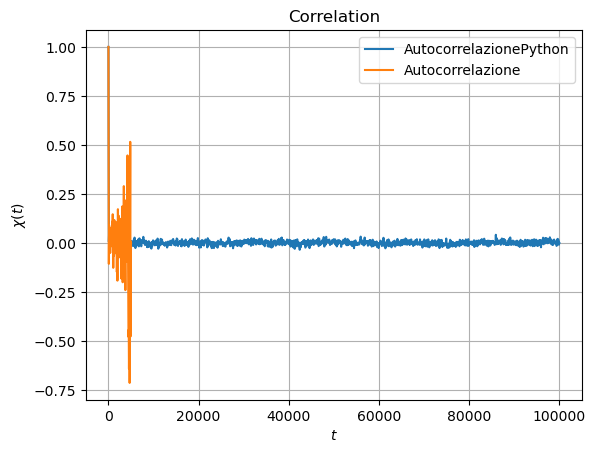

In [79]:
x = np.arange(100001)
x1 = np.arange(5000)
plt.figure(1)
plt.plot(x, chi2, label='AutocorrelazionePython')
plt.plot(x1, chi, label='Autocorrelazione')
plt.xlabel('$t$')
plt.ylabel('$\chi(t)$')
plt.title('Correlation')
plt.legend()
plt.grid()
plt.show()